## Data analysis using R

In [1]:
df = read.csv('preparation.csv')

In [2]:
category_columns <- c('loan_type', 'loan_purpose', 'preapproval', 'action_type', 'county_name', 
                      'applicant_ethnicity', 'co_applicant_ethnicity', 
                      'applicant_race_1', 'applicant_sex', 'hoepa_status', 'lien_status')

In [3]:
for (col in category_columns){df[,col] <- as.factor(df[,col])}

In [4]:
amount_columns = c('loan_amount_ink', 'applicant_income_ink', 'hud_median_family_income')
for (col in amount_columns){df[,col] <- log(df[,col])}

In [5]:
upper = quantile(df$loan_amount_ink, c(.95))[[1]]
lower = quantile(df$loan_amount_ink, c(.05))[[1]]
df = df[df$loan_amount_ink > lower & df$loan_amount_ink < upper,]

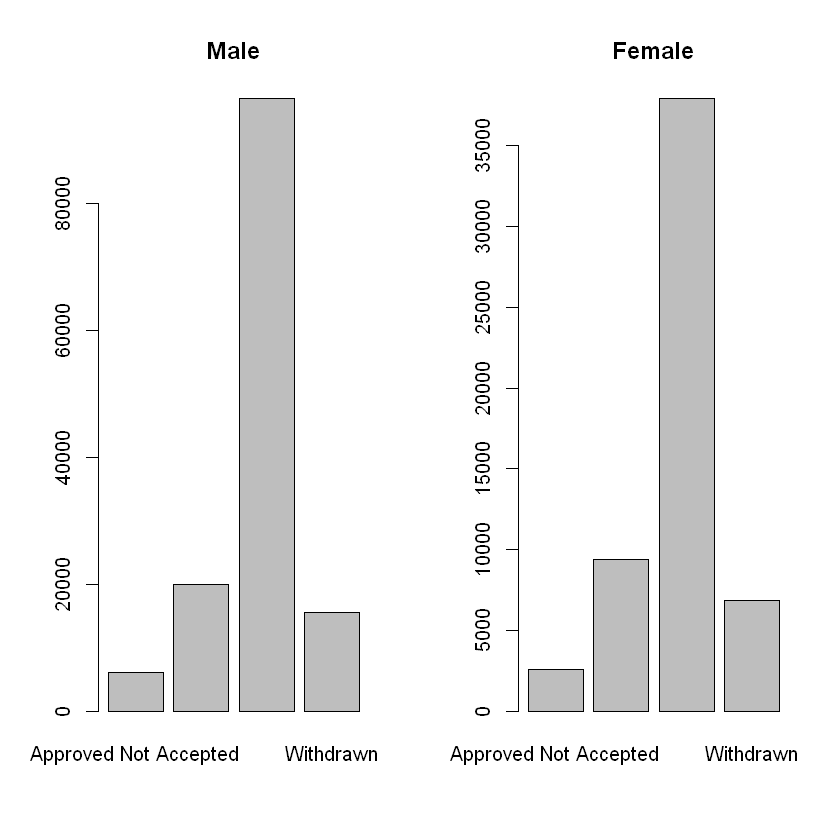

In [6]:
par(mfrow=c(1,2))
plot(df[df[,'applicant_sex'] == "Male",][,'action_type'], main="Male")
plot(df[df[,'applicant_sex'] == "Female",][,'action_type'], main="Female")

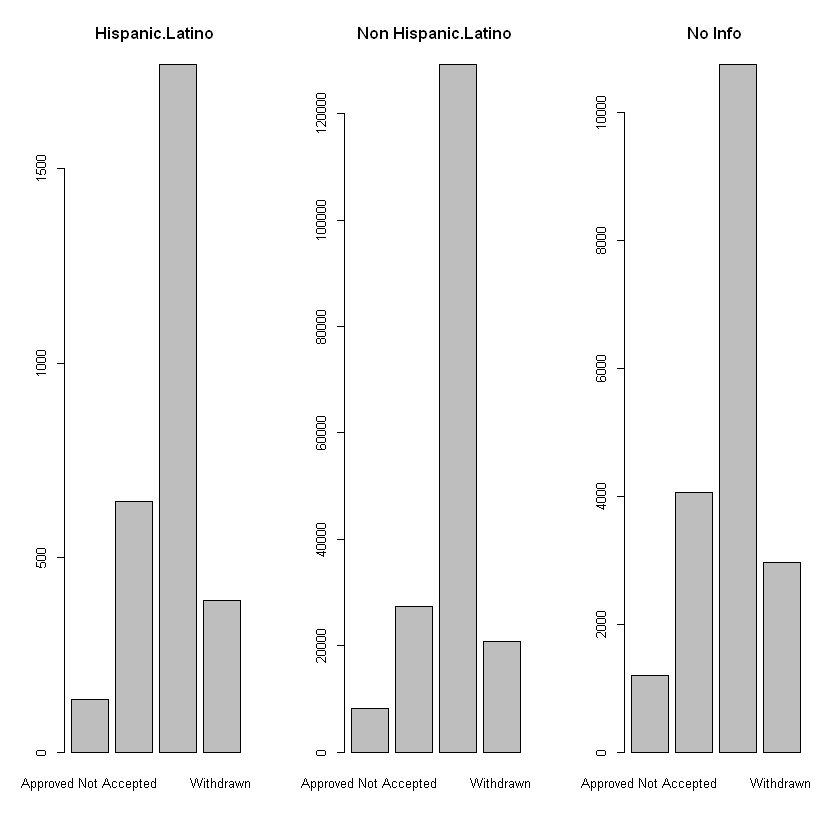

In [7]:
par(mfrow=c(1,3))
plot(df[df[,'applicant_ethnicity'] == "Hispanic.Latino",][,'action_type'], main="Hispanic.Latino")
plot(df[df[,'applicant_ethnicity'] == "Non Hispanic.Latino",][,'action_type'], main="Non Hispanic.Latino")
plot(df[df[,'applicant_ethnicity'] == "No Info",][,'action_type'], main="No Info")

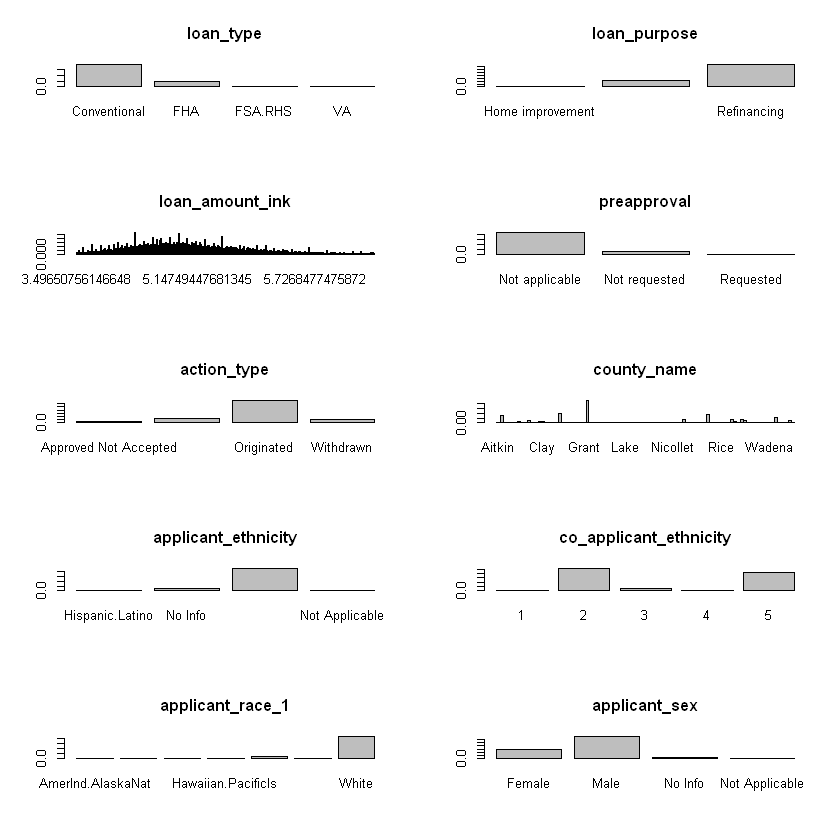

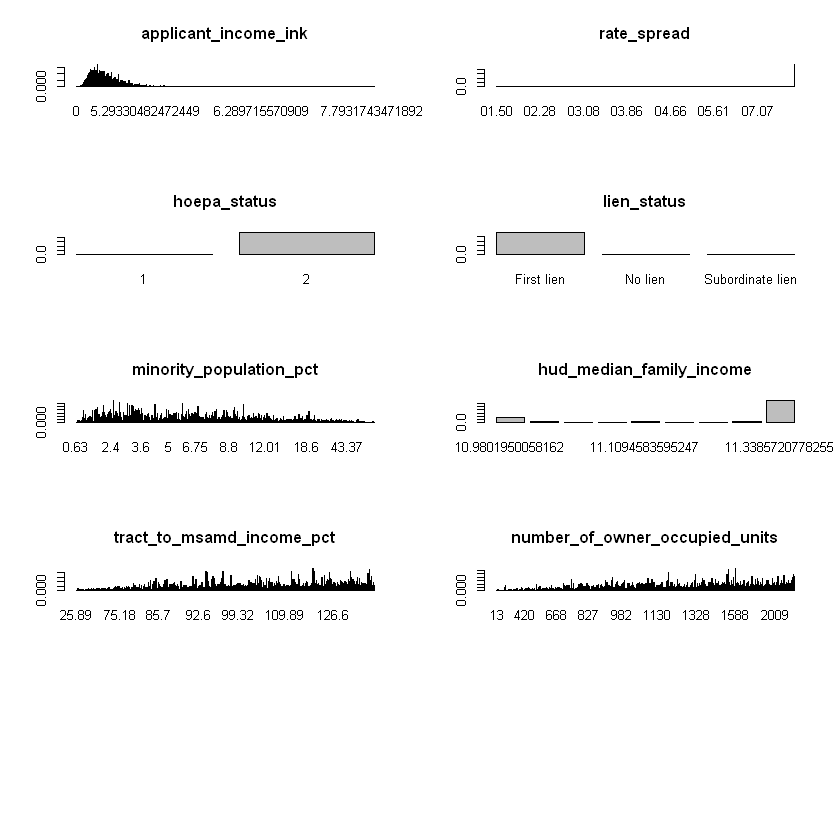

In [8]:
par(mfrow=c(5,2))
for (name in colnames(df)){
    barplot(prop.table(table(df[[name]])), main=name)
}

In [9]:
df = df[df$action_type %in% c('Denied', 'Originated'),]
df$target = mapply(function(type) {if (type == 'Denied') 0 else 1}, df$action_type)

In [10]:
write.table(df, 'analysis.csv')